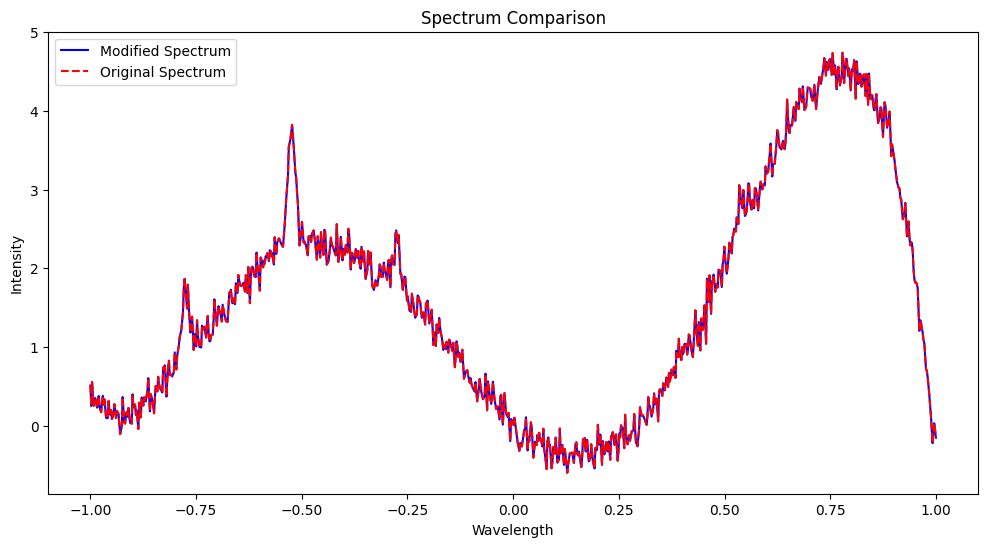

In [1]:
# 1) Cosmic ray removal (one sprectrum)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file
file_path = '/kaggle/input/synthdatas/synthetic_spectra_xy1.csv'
data = pd.read_csv(file_path)

# Actual column names
wave_column = 'Wave'
intensity_column = 'Intensity'

# Calculate second difference to accentuate sharp spikes
first_difference = np.diff(data[intensity_column], n=1)
second_difference = np.diff(first_difference, n=1)

# Identify points where second difference exceeds a predefined threshold, indicating a cosmic ray spike
threshold = 0.2
cosmic_ray_indices = np.where(second_difference > threshold)[0]

# Replace these points using linear interpolation from neighboring data points
for index in cosmic_ray_indices:
    if index - 1 >= 0 and index + 1 < len(data): # index must be within a valid range
        left_neighbor = data.at[index - 1, intensity_column]
        right_neighbor = data.at[index + 1, intensity_column]

        # Linear interpolation to replace cosmic ray spike
        interpolated_value = left_neighbor + (right_neighbor - left_neighbor) / 2
        data.at[index, intensity_column] = interpolated_value

# Save DataFrame
output_file_path = '/kaggle/working/output_spectrum1.csv'

# Plot original & modified spectra
plt.figure(figsize=(12, 6))
plt.plot(data['Wavelength'], data['Intensity'], label='Modified Spectrum', color='blue')
plt.plot(data['Wavelength'], data['Intensity'], label='Original Spectrum', linestyle='dashed', color='red')
plt.title('Spectrum Comparison')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.legend()
plt.show()